In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
!pip install geopandas

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/CMPT_733_Project/'

Mounted at /content/drive


In [4]:
# path = '../data/'

In [5]:
data = pd.read_parquet(path+'final_dataset.parquet')

In [6]:
data.head()

,county,date,daily_cases,daily_cases_by_population,daily_deaths,daily_deaths_by_population,POP2020,Partially Vaccinated,Fully Vaccinated,Non Vaccinated,...,Number of ICU Beds By County,Number of ICU Beds Available By County,Total Beds By County per thousand ppl,Number of ICU Beds By County per thousand ppl,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Albany,2021-01-01,11917,0.037850,205,0.000651,314848,5757.0,17.0,309091.0,...,153.0,22.0,3.849477,0.485949,-56.0,-38.0,-15.0,-71.0,-77.0,29.0
1,Albany,2021-01-01,11917,0.037850,205,0.000651,314848,5757.0,17.0,309091.0,...,153.0,22.0,3.849477,0.485949,-56.0,-38.0,-15.0,-71.0,-77.0,29.0
2,Albany,2022-01-01,41133,0.130644,439,0.001394,314848,241673.0,219390.0,73175.0,...,102.0,5.0,3.074499,0.323966,-49.0,-36.0,52.0,-54.0,-45.0,10.0
3,Albany,2022-01-01,41133,0.130644,439,0.001394,314848,241673.0,219390.0,73175.0,...,102.0,5.0,3.074499,0.323966,-49.0,-36.0,52.0,-54.0,-45.0,10.0
4,Albany,2021-01-10,14196,0.045088,231,0.000734,314848,12016.0,855.0,302832.0,...,163.0,30.0,3.957465,0.517710,-35.0,-13.0,34.0,-55.0,-19.0,8.0


In [7]:
data.columns

Index(['county', 'date', 'daily_cases', 'daily_cases_by_population',
       'daily_deaths', 'daily_deaths_by_population', 'POP2020',
       'Partially Vaccinated', 'Fully Vaccinated', 'Non Vaccinated',
       'Partially Vaccinated per Population',
       'Fully Vaccinated per Population', 'Non Vaccinated per Population',
       'Facility Name', 'Patients Age 55 to 64 Years',
       'Patients Age 65 to 74 Years', 'Patients Age 75 to 84 Years',
       'Patients Currently Hospitalized', 'Patients Newly Admitted',
       'Patients Positive After Admission', 'Patients Currently in ICU',
       'Patients Currently ICU Intubated', 'Total Beds',
       'Number of Beds Available', 'Number of ICU Beds',
       'Number of ICU Beds Available', 'Total Beds By County',
       'Number of Beds Available By County', 'Number of ICU Beds By County',
       'Number of ICU Beds Available By County',
       'Total Beds By County per thousand ppl',
       'Number of ICU Beds By County per thousand ppl',
    

In [8]:
df = data[['date', 'county', 'daily_cases_by_population', 'daily_deaths_by_population',
            'Fully Vaccinated per Population', 'Patients Currently Hospitalized', 'POP2020']]
df = df.groupby(['date', 'county', 'daily_cases_by_population', 'daily_deaths_by_population', 
                  'Fully Vaccinated per Population', 'POP2020'])['Patients Currently Hospitalized'].sum().reset_index()
df['hospitalizations_by_population'] = df.apply(lambda x: x['Patients Currently Hospitalized']/x['POP2020'], axis=1)


In [9]:
df = df.rename(columns={'Fully Vaccinated per Population':'fully_vacc_by_pop', 
                'Patients Currently Hospitalized':'patients_curr_hosp',
                'hospitalizations_by_population':'hosp_by_pop'})
df.head(1)

,date,county,daily_cases_by_population,daily_deaths_by_population,fully_vacc_by_pop,POP2020,patients_curr_hosp,hosp_by_pop
0,2020-03-26,Albany,0.000543,0.0,0.0,314848,22.0,0.00007


In [10]:
def assign_levels(row, col, min, max):
  range = max-min
  if row[col] < (min+(0.33*range)):
    return 'low'
  elif row[col] < (min+(0.66*range)):
    return 'medium'
  else:
    return 'high'

In [11]:
min = df['daily_cases_by_population'].min()
max = df['daily_cases_by_population'].max()
df['case_level'] = df.apply(lambda x: assign_levels(x, 'daily_cases_by_population', min, max), axis=1)

min = df['daily_deaths_by_population'].min()
max = df['daily_deaths_by_population'].max()
df['death_level'] = df.apply(lambda x: assign_levels(x, 'daily_deaths_by_population', min, max), axis=1)

min = df['fully_vacc_by_pop'].min()
max = df['fully_vacc_by_pop'].max()
df['vacc_level'] = df.apply(lambda x: assign_levels(x, 'fully_vacc_by_pop', min, max), axis=1)

min = df['hosp_by_pop'].min()
max = df['hosp_by_pop'].max()
df['hosp_level'] = df.apply(lambda x: assign_levels(x, 'hosp_by_pop', min, max), axis=1)

In [12]:
print(df['case_level'].unique())
print(df['death_level'].unique())
print(df['vacc_level'].unique())
print(df['hosp_level'].unique())

['low' 'medium' 'high']
['low' 'medium' 'high']
['low' 'medium' 'high']
['low' 'medium' 'high']


In [13]:
def set_ranks(row, col):
  if row['vacc_level'] == 'low':
    if row[col] == 'low':
      return 1
    elif row[col] == 'medium':
      return 2
    else:
      return 3
  elif row['vacc_level'] == 'medium':
    if row[col] == 'low':
      return 4
    elif row[col] == 'medium':
      return 5
    else:
      return 6
  else:
    if row[col] == 'low':
      return 7
    elif row[col] == 'medium':
      return 8
    else:
      return 9

In [14]:
df['case_vacc'] = df.apply(lambda x: set_ranks(x, 'case_level'), axis=1)
df['death_vacc'] = df.apply(lambda x: set_ranks(x, 'death_level'), axis=1)
df['hosp_vacc'] = df.apply(lambda x: set_ranks(x, 'hosp_level'), axis=1)

In [15]:
print(df['case_vacc'].unique())
print(df['death_vacc'].unique())
print(df['hosp_vacc'].unique())

[1 2 4 5 7 8 9 6]
[1 2 3 4 5 6 7 8 9]
[1 2 3 4 7 5 8]


In [16]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
# import matplotlib.animation as ani
from matplotlib.pyplot import figure

In [ ]:
!pip install contextily


In [18]:
import contextily as cx

In [19]:
street_map = gpd.read_file(path+'NYS_Civil_Boundaries.shp.zip')

In [20]:
street_map = street_map.rename(columns={'COUNTY':'county'})
street_map.head(1)

,NAME,MUNI_TYPE,MUNITYCODE,county,GNIS_ID,FIPS_CODE,SWIS,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,MAP_SYMBOL,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry
0,Adams,town,2,Jefferson,978655,3604500210,222000,4977,4782,5143,4973,None,None,T,42.361757,2018-11-06,41971.838963,1.097164e+08,"POLYGON ((419711.937 4860894.762, 420725.148 4..."


In [ ]:
!pip install mapclassify

In [22]:
import matplotlib.colors as colors
import mapclassify
# import geoplot
%matplotlib inline

In [23]:
def plot_geo_data(df, col_name, ax, fig, title="", show_base_cbar=False, show_base_map=False):
    k = 1600  # I find that the more colors, the smoother the viz becomes as data points are spread across gradients
    cmap = 'YlGnBu'
    figsize = (20, 15)
    scheme = 'Quantiles'
    crs = {'init': 'epsg:4326'}

    subset = df.copy()
    # print(subset.head(5))
    # subset['pop_density'] = subset['POP2020']/subset['CALC_SQ_MI']

    subset = subset.to_crs(crs)
    subset.plot(column=col_name, cmap=cmap, figsize=figsize, ax=ax,
                scheme=scheme, k=k, legend=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Adding Colorbar for legibility

    # normalize color
    vmin, vmax, vcenter = subset[col_name].min(), subset[col_name].max(), subset[col_name].mean()
    print("min {}, max {}, mid {}".format(vmin, vmax, vcenter))
    divnorm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    # create a normalized colorbar
    if show_base_cbar:
        cbar = plt.cm.ScalarMappable(norm=divnorm, cmap=cmap)
        fig.colorbar(cbar, ax=ax)
    ax.set(title=title,
           ylabel="Latitude", xlabel="Longitude")
    if show_base_map:
        cx.add_basemap(ax, crs=crs, source=cx.providers.Stamen.TonerLite)


In [24]:
subset = df.copy()

In [25]:
print(subset['case_vacc'].min())
print(subset['case_vacc'].mean())
print(subset['case_vacc'].max())

1
3.4258147512864494
9


min 0.02033492822966507, max 0.08871542197092179, mid 0.04285941466348625
min 0.00020504875603754671, max 0.003009816916718063, mid 0.0010103773286295732
min 0.0, max 6.206168931918326e-05, mid 1.6075077633853482e-05
min 0.0, max 0.000981425957922553, mid 0.00038531143007544254


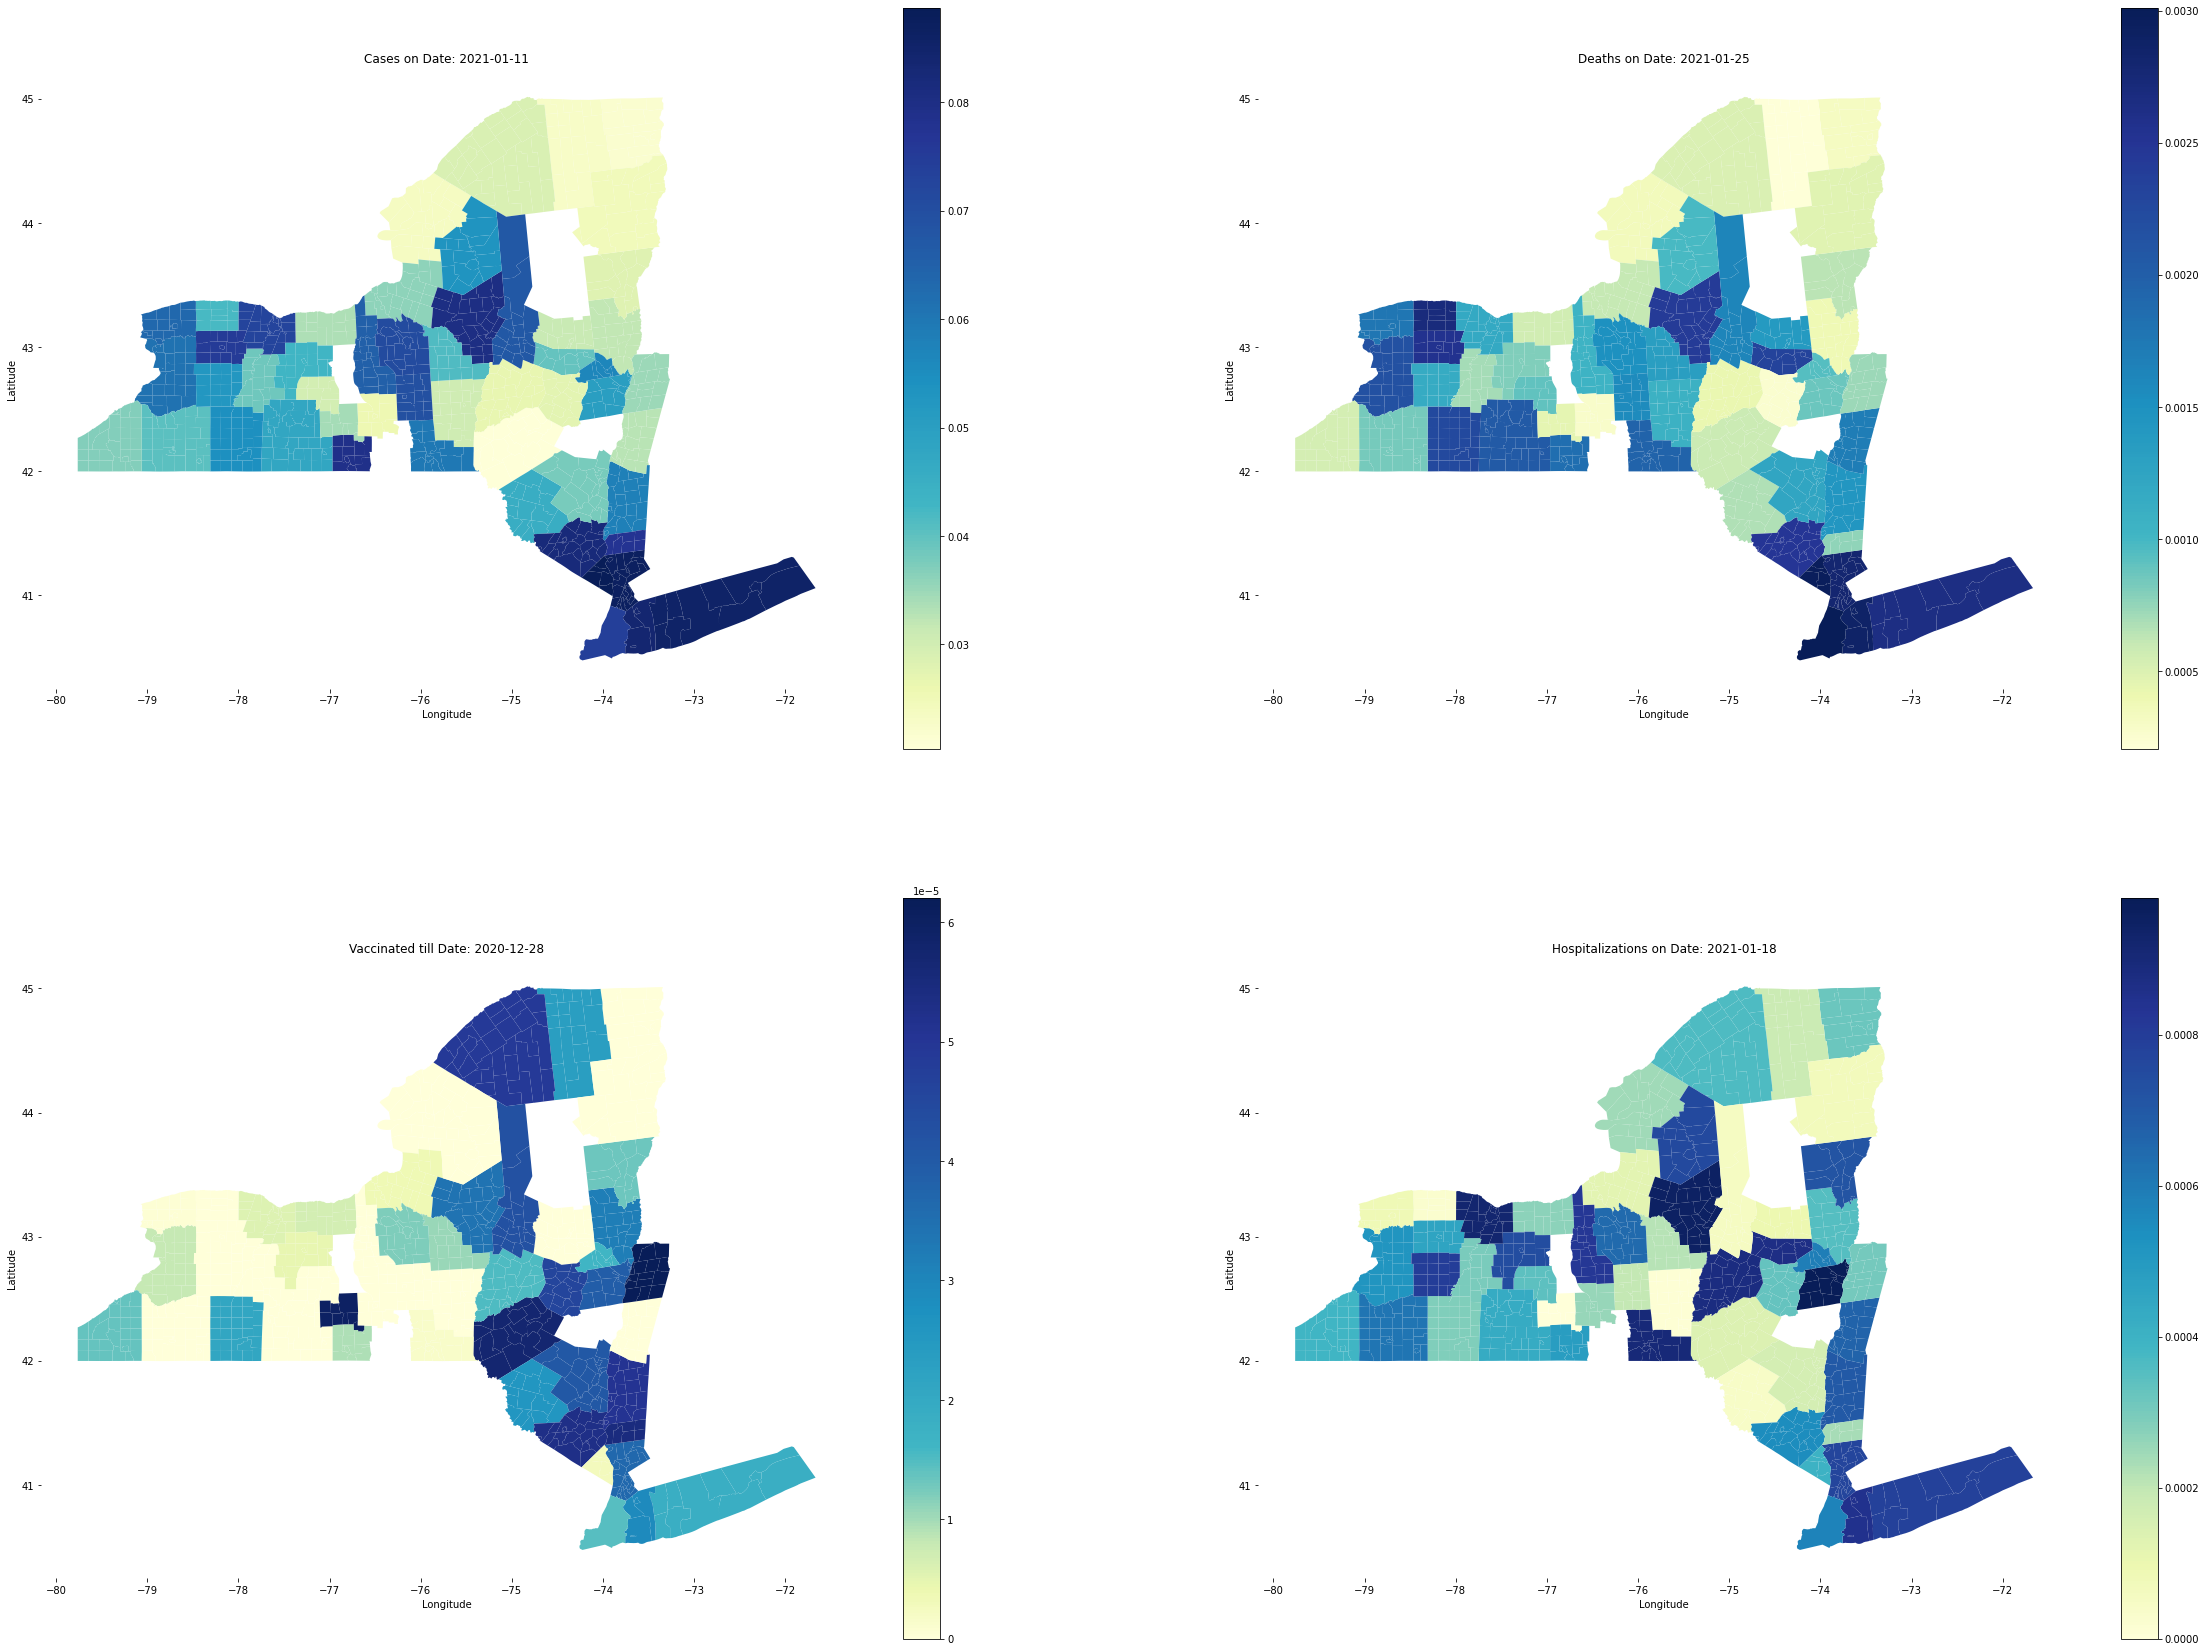

In [29]:
import warnings
warnings.filterwarnings('ignore')
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(40,30), ncols=2,nrows=2)

for date,ax in [('2021-01-11',ax1)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_cases_by_population', ax=ax, fig=fig, title="Cases on Date: "+date, show_base_cbar=True)

for date,ax in [('2021-01-25',ax2)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_deaths_by_population', ax=ax, fig=fig, title="Deaths on Date: "+date, show_base_cbar=True)

for date,ax in [('2020-12-28',ax3)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'fully_vacc_by_pop', ax=ax, fig=fig, title="Vaccinated till Date: "+date, show_base_cbar=True)

for date,ax in [('2021-01-18',ax4)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'hosp_by_pop', ax=ax, fig=fig, title="Hospitalizations on Date: "+date, show_base_cbar=True)

min 0.04120484206544354, max 0.13890325688900448, mid 0.07902953889131444
min 0.0002733983413833956, max 0.003797623631475468, mid 0.0013428327979486602
min 0.3185859760167065, max 0.5972743512032596, mid 0.45964942387090635
min 0.0, max 4.513857542655954e-05, mid 1.2220617163757494e-05


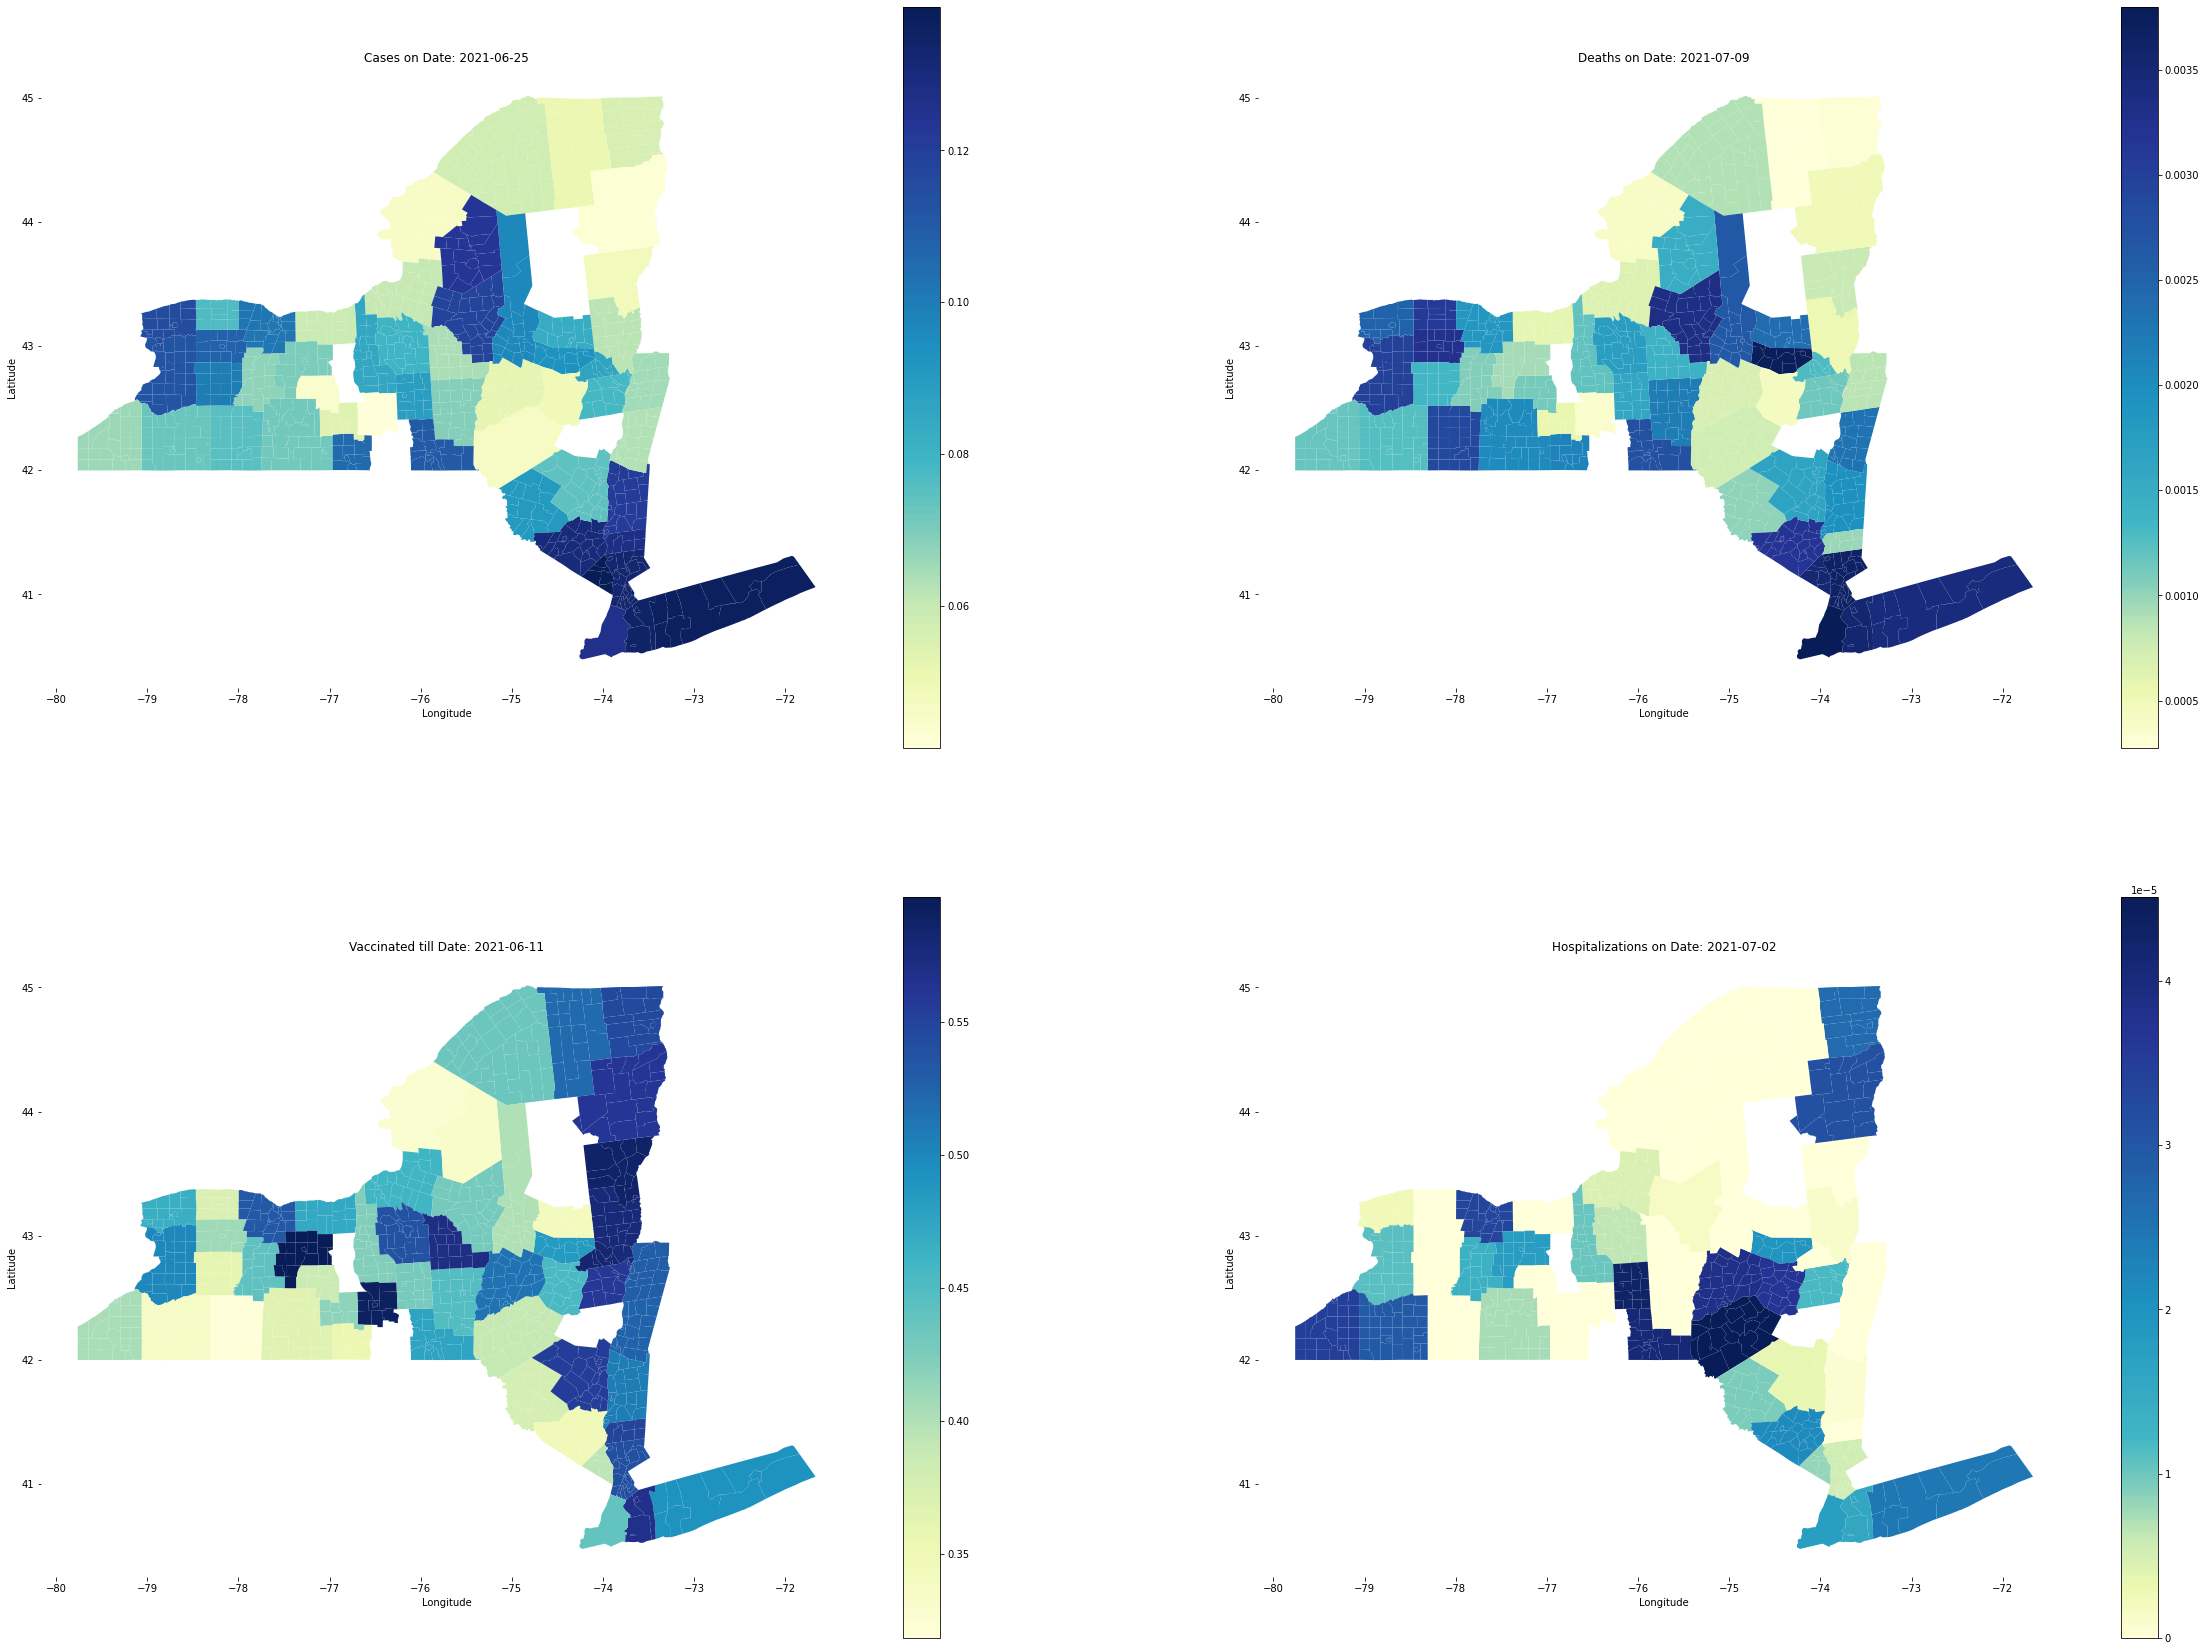

In [30]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(40,30), ncols=2,nrows=2)

for date,ax in [('2021-06-25',ax1)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_cases_by_population', ax=ax, fig=fig, title="Cases on Date: "+date, show_base_cbar=True)

for date,ax in [('2021-07-09',ax2)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_deaths_by_population', ax=ax, fig=fig, title="Deaths on Date: "+date, show_base_cbar=True)

for date,ax in [('2021-06-11',ax3)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'fully_vacc_by_pop', ax=ax, fig=fig, title="Vaccinated till Date: "+date, show_base_cbar=True)

for date,ax in [('2021-07-02',ax4)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'hosp_by_pop', ax=ax, fig=fig, title="Hospitalizations on Date: "+date, show_base_cbar=True)

min 0.04911586099890319, max 0.1471348894123767, mid 0.08818390916853723
min 0.0003645311218445275, max 0.003873155849657947, mid 0.00143294949819887
min 0.3699972012314582, max 0.6676033157377115, mid 0.5228801965173003
min 2.1177467174925878e-05, max 0.0003042426639487655, mid 0.0001509935322444214


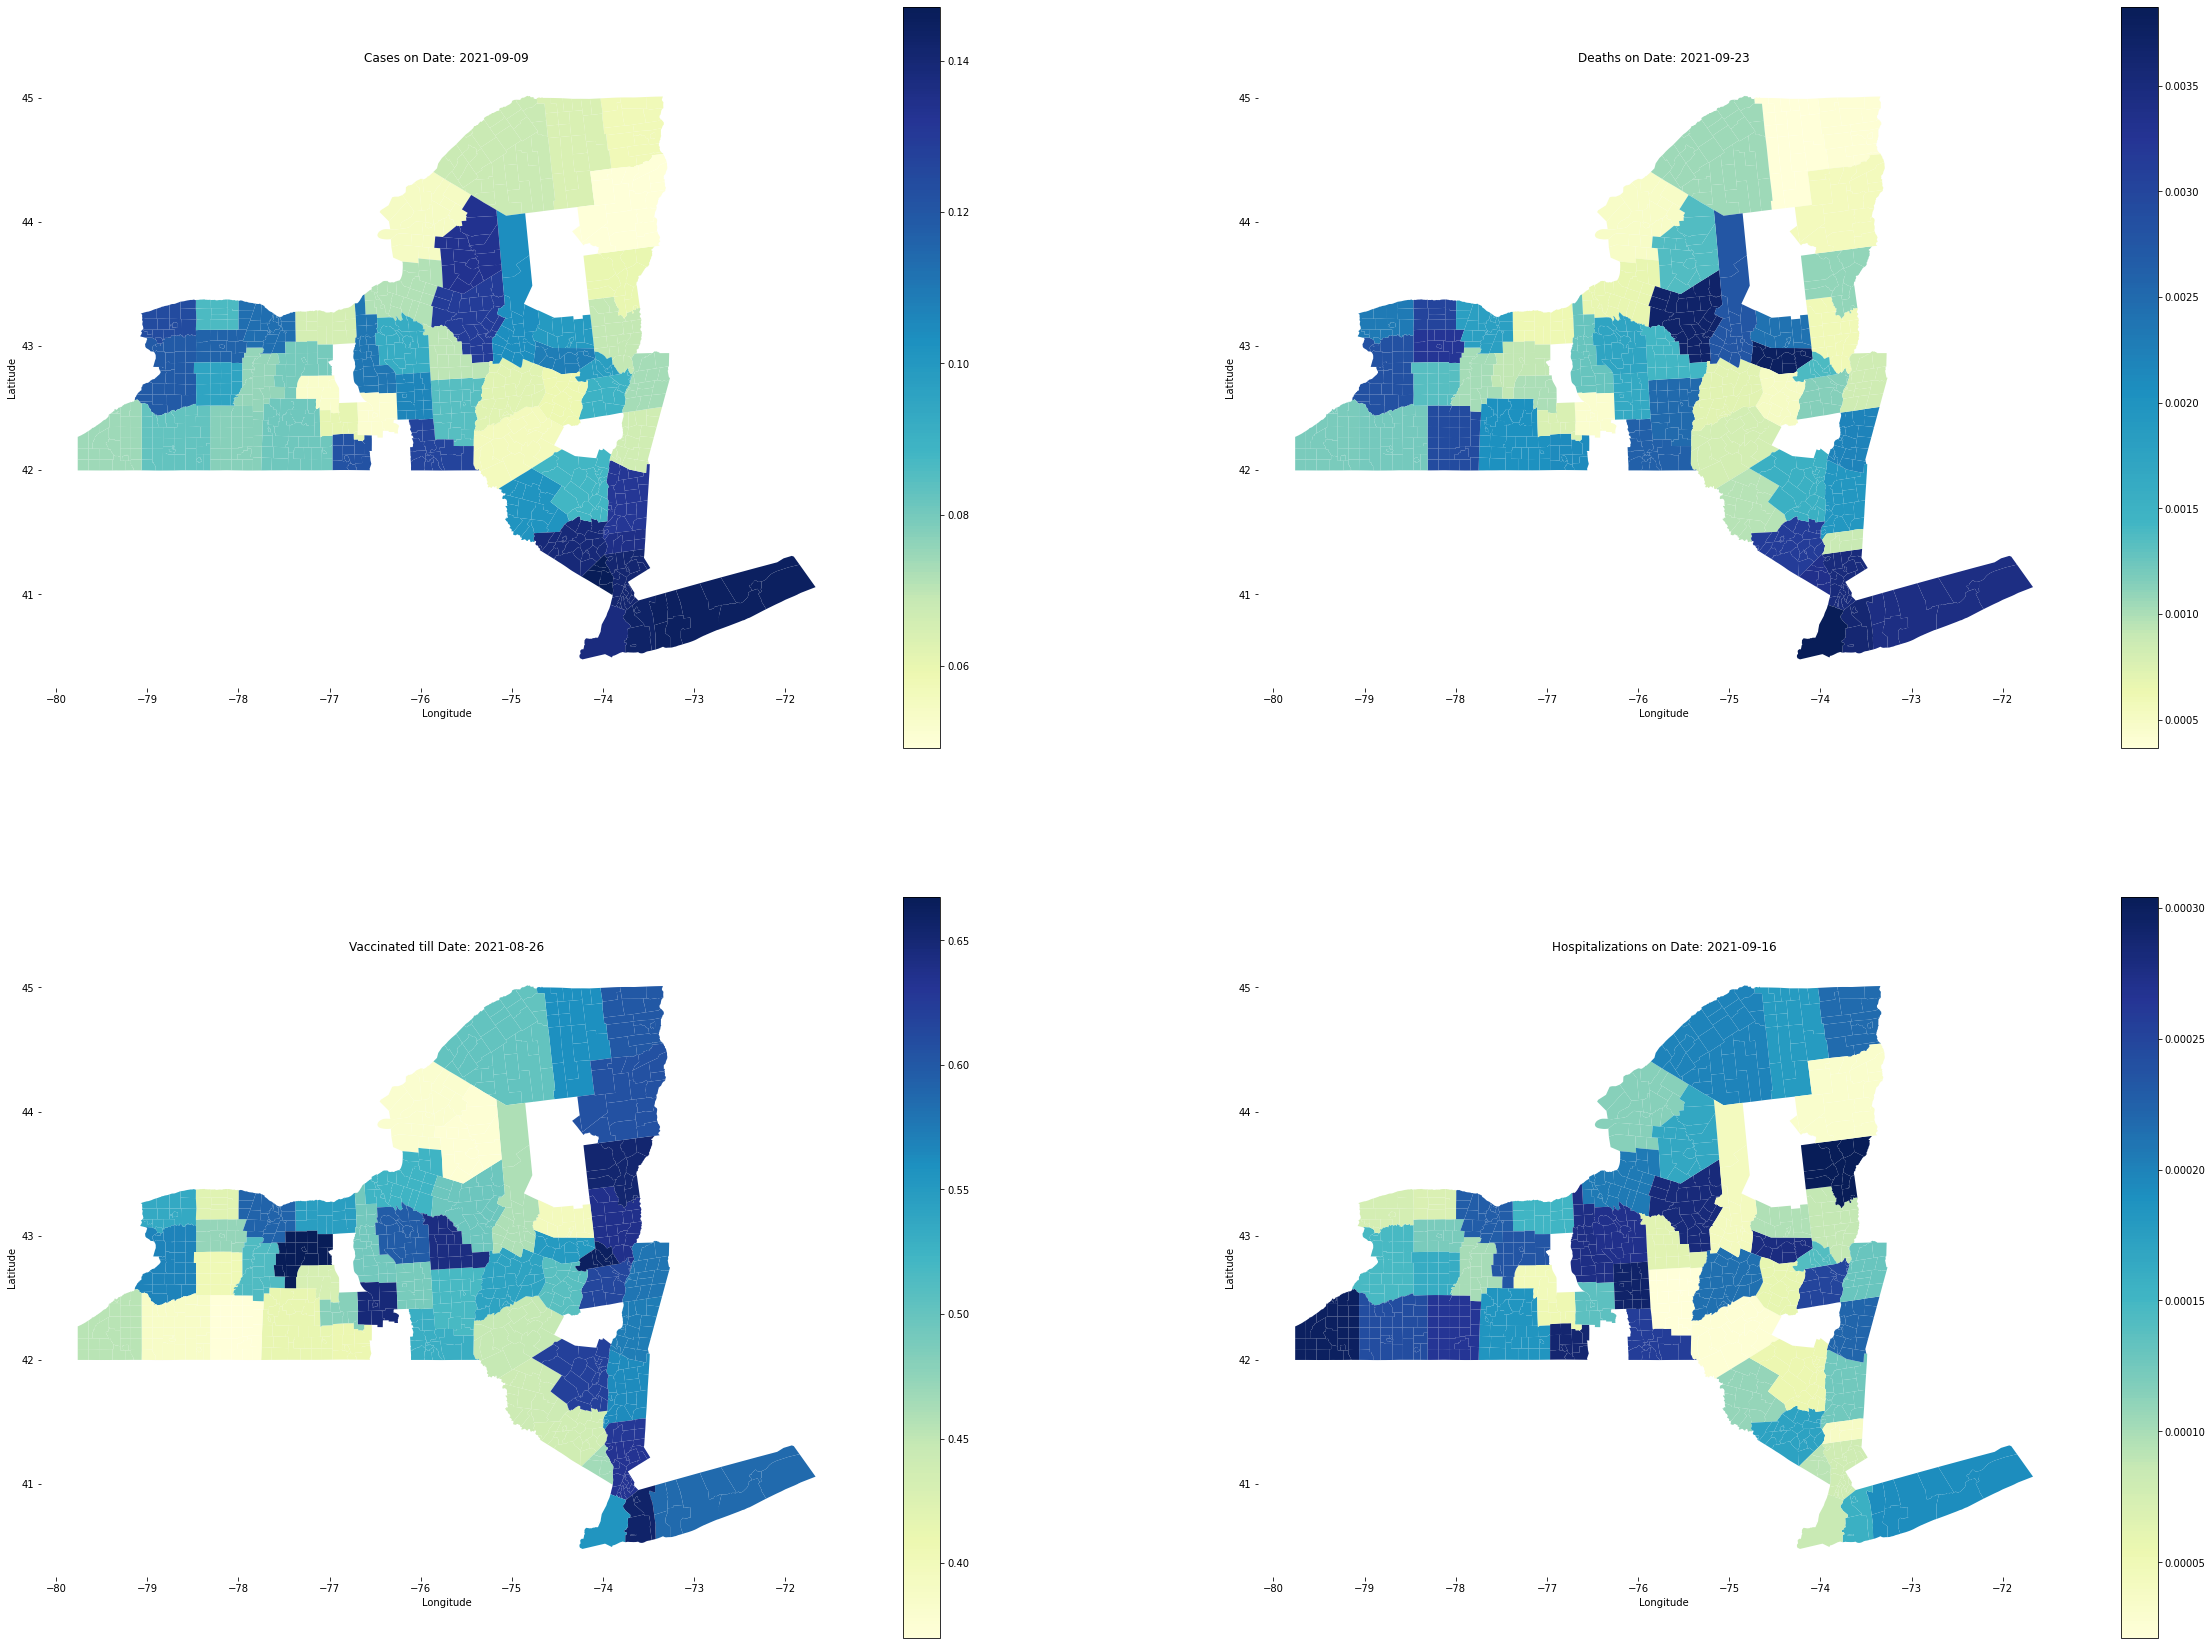

In [31]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(40,30), ncols=2,nrows=2)

for date,ax in [('2021-09-09',ax1)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_cases_by_population', ax=ax, fig=fig, title="Cases on Date: "+date, show_base_cbar=True)

for date,ax in [('2021-09-23',ax2)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_deaths_by_population', ax=ax, fig=fig, title="Deaths on Date: "+date, show_base_cbar=True)

for date,ax in [('2021-08-26',ax3)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'fully_vacc_by_pop', ax=ax, fig=fig, title="Vaccinated till Date: "+date, show_base_cbar=True)

for date,ax in [('2021-09-16',ax4)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'hosp_by_pop', ax=ax, fig=fig, title="Hospitalizations on Date: "+date, show_base_cbar=True)

min 0.11931864051021232, max 0.2742707630318375, mid 0.1852609788175658
min 0.0007282012483449972, max 0.004403017199765112, mid 0.0020622346791495587
min 0.44838424939180604, max 0.7670754470826726, mid 0.6076491182014873
min 2.1177467174925878e-05, max 0.0007123641932310918, mid 0.00029353502150920483


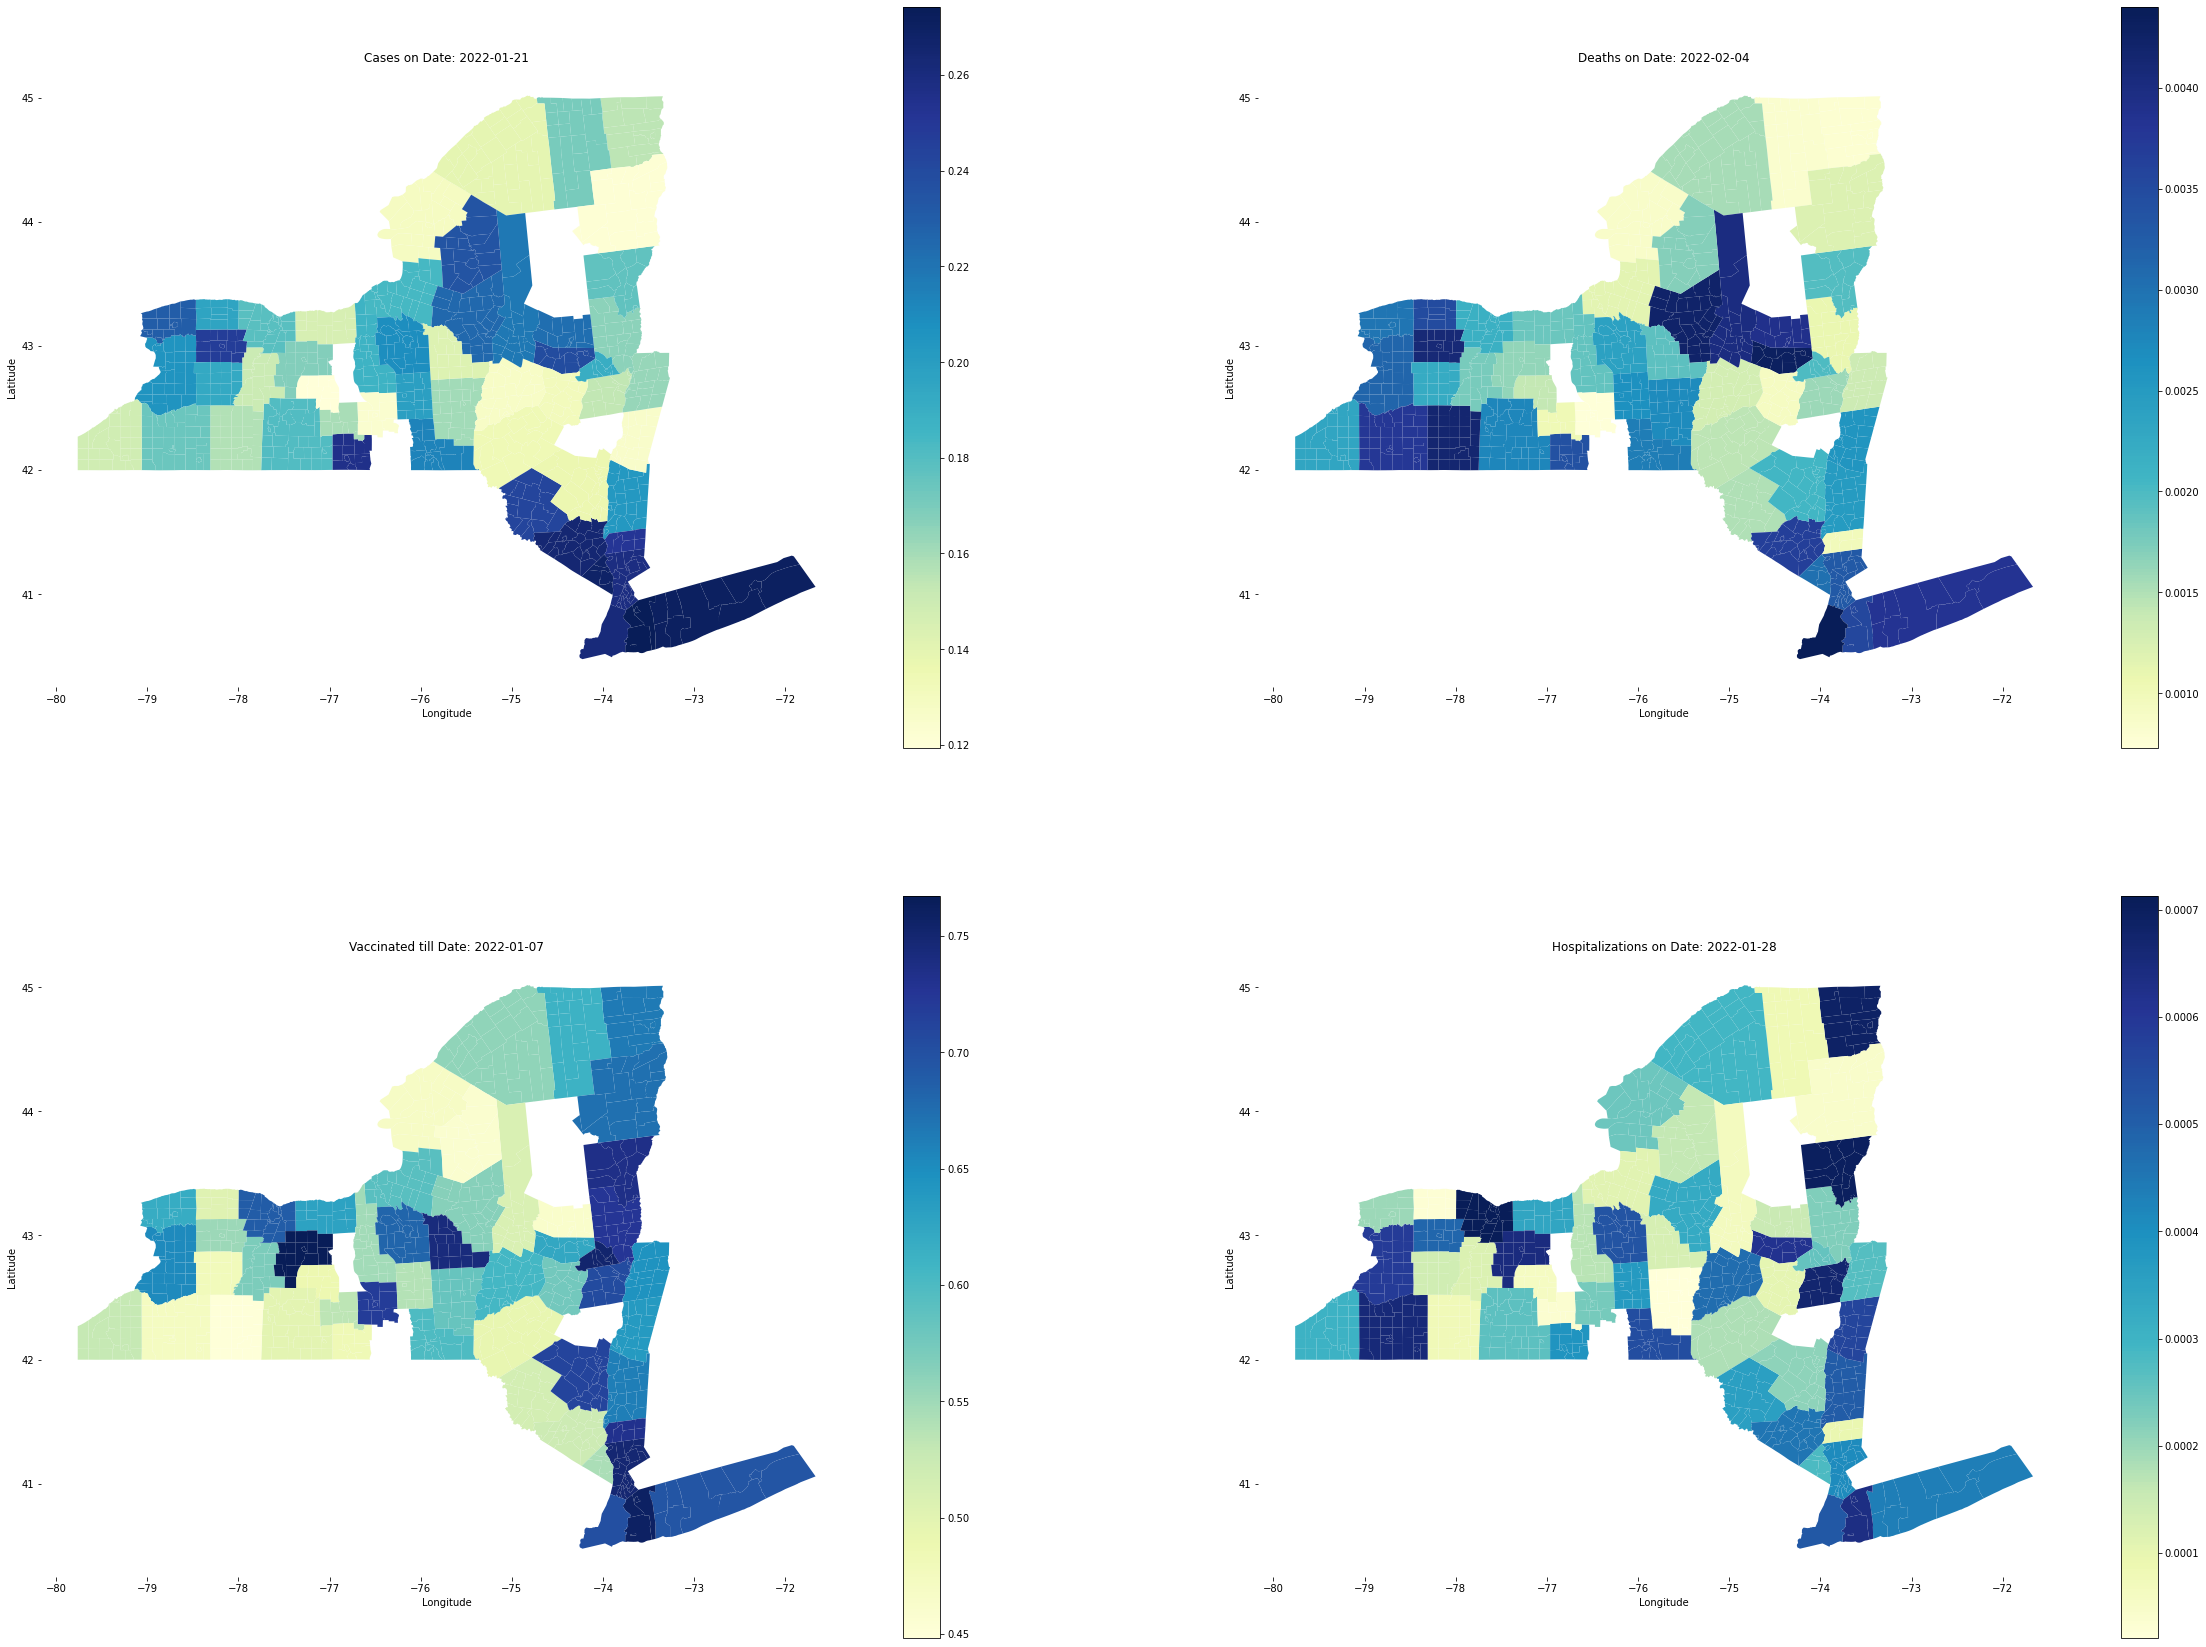

In [32]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(40,30), ncols=2,nrows=2)

for date,ax in [('2022-01-21',ax1)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_cases_by_population', ax=ax, fig=fig, title="Cases on Date: "+date, show_base_cbar=True)

for date,ax in [('2022-02-04',ax2)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'daily_deaths_by_population', ax=ax, fig=fig, title="Deaths on Date: "+date, show_base_cbar=True)

for date,ax in [('2022-01-07',ax3)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'fully_vacc_by_pop', ax=ax, fig=fig, title="Vaccinated till Date: "+date, show_base_cbar=True)

for date,ax in [('2022-01-28',ax4)]:
    #,('2021-01-25',ax2)
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['county'])
    plot_geo_data(temp, 'hosp_by_pop', ax=ax, fig=fig, title="Hospitalizations on Date: "+date, show_base_cbar=True)

**Conclusion:** There isn't any obvious general trend that we see between vaccination and cases/deaths/hospitalization. Each county has its own pattern.